### Natural Language Processing

Natural Language Processing (NLP) is a domain within Computer Science, specifically under the umbrella of Artificial Intelligence (AI). It equips computers with the ability to interpret, understand, and process human language—both text and speech—as naturally as humans do.

At the core of NLP lies a blend of computational linguistics—rules-based modeling of human language—with the dynamic power of statistical methods, machine learning, and deep learning models. This integration allows computers not only to process human language, whether in text or voice form but also to grasp the complete meaning, discerning the intent and sentiment of the speaker or writer.

For our exploration into the world of NLP, we will leverage the capabilities of prominent libraries including:
- **sklearn**
- **nltk**

NLP finds its application in a myriad of real-world scenarios, enhancing and streamlining our interactions and processes. Some notable applications are:
- Machine translation, bridging language barriers across the globe
- Spam detection, safeguarding our inboxes from unwanted emails
- Text summarization, distilling lengthy documents into concise summaries
- Chatbots, providing instant customer support and engagement

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import string
# from string import punctuation
# from itertools import chain

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_selection import SelectPercentile, chi2, f_regression, f_classif

# from sklearn import svm
from sklearn.utils import shuffle

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import ngrams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**CountVectorizer** - Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.

In [41]:
corpus = ['Apple Orange Orange Apple',\
  'Apple Banana Apple Banana',\
  'Banana Apple Banana Banana Banana Apple',\
  'Banana Orange Banana Banana Orange Banana',\
  'Banana Apple Banana Banana Orange Banana']

print("Using count vectorizer")
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(corpus)
print(pd.DataFrame(tf.A, columns=tf_vectorizer.get_feature_names_out()).to_string())

Using count vectorizer
   apple  banana  orange
0      2       0       2
1      2       2       0
2      2       4       0
3      0       4       2
4      1       4       1


**TfidfVectorizer** - TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.


**Term Frequency (tf)**:
$\[ tf(t) = \text{"Number of times term } t \text{ occurs in a document"} \]$


**Inverse Document Frequency (idf)**:
$\[ idf(t) = \log_e \left( \frac{1 + n}{1 + df(t)} \right) + 1 \]$

Where:
- $\(t\)$ represents the term.
- $\(n\)$ is the total number of documents in the document set.
- $\(df(t)\)$ is the number of documents in the document set that contain the term \(t\).

- Reference: https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/

In [42]:
print("\nUsing tfidf")
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(corpus)
print(pd.DataFrame(tfidf.A, columns=tfidf_vec.get_feature_names_out()).to_string())


Using tfidf
      apple    banana    orange
0  0.643744  0.000000  0.765241
1  0.707107  0.707107  0.000000
2  0.447214  0.894427  0.000000
3  0.000000  0.859622  0.510931
4  0.233043  0.932173  0.277026


### Dataset:
- https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv

In [43]:
df = pd.read_csv('Reviews.csv')

In [44]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [45]:
df.shape

(568454, 10)

- We would like to get an idea of the number of records that are 3 star and lower as well as 3 star and higher.

In [46]:
pos = df[df['Score']>3]
neg = df[df['Score']<3]
print(pos.shape, neg.shape)

(443777, 10) (82037, 10)


In [47]:
pos = pos.head(neg.shape[0])
print(pos.shape, neg.shape)
df = pd.concat([pos,neg])

(82037, 10) (82037, 10)


In [48]:
df = shuffle(df)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
17696,17697,B000R32F6M,A1HBC0NBQJHT7X,Bookphile,5,5,5,1246579200,Rich and delicious,Finding high-quality decaffeinated teas in a v...
147721,147722,B001D0IZBM,A3COOTPHEAASH,"Lafaye Jacques ""LAFAYE""",0,4,1,1237248000,BAD BATCH??????????,"I BOUGHT THIS COFFEE DUE TO THE RAVE REVIEWS, ..."
503502,503503,B001NGASNY,A30IW8LWH4668G,Mary Hale,0,2,2,1325635200,Frontier Soups chicken noodle,Not as good as the Tortilla soup -- which tast...
104319,104320,B000EZMRQG,A8K4F294YGV4S,Katherine M. Stroup,0,0,5,1188864000,THE BEST Turkey Jerky,SnackMasters Teriyaki Turkey Jerky has the bes...
65789,65790,B0007A0AQW,A15LY74DGRO28E,Ricki,0,0,5,1345420800,Zukes Peanut Butter Mini Treats,This product is my dog's absolute favorite whe...


### Preprocessing
- Remove all neutral scores and seperate the remaning into positive = 1 and negative = 0.
- Preprocessing ususally involves:
    - Removing additional white spaces
    - Replacing emoji's with a word representation for example :) ==> smile
    - Removing links from the corpus
    - Removing punctuation
    - Removing HTML tags
    - Remove duplicate reviews
    - Here are some good links on how to process and clean text: 
        - https://adataanalyst.com/scikit-learn/countvectorizer-sklearn-example/ and https://machinelearningmastery.com/clean-text-machine-learning-python/

- **For this exercise we will only tokenize reviews, that is change "This is a review" to ['this', 'is', 'a', 'review'].**
- After the text is 'clean' we will use sklearn.

In [49]:
df = df[df['Score'] !=3]
X = df['Text']

y_map = {1:0, 2:0, 4:1, 5:1}
y = df['Score'].map(y_map)
# y = df['Score'].apply(lambda x: 0 if x < 3 else 1) # another way to do it

In [50]:
X.head(5)

17696     Finding high-quality decaffeinated teas in a v...
147721    I BOUGHT THIS COFFEE DUE TO THE RAVE REVIEWS, ...
503502    Not as good as the Tortilla soup -- which tast...
104319    SnackMasters Teriyaki Turkey Jerky has the bes...
65789     This product is my dog's absolute favorite whe...
Name: Text, dtype: object

In [51]:
y.head(5)

17696     1
147721    0
503502    0
104319    1
65789     1
Name: Score, dtype: int64

### Classification

Once the text is processed the next step is to do the actual classification. For this exercise we will be using a Logistic Regression Classifier. However there are many other popular classifiers that may perform better:

- Support Vector Machine and its variants
- Naive Bayes and its variants
- Random Forests and its variants

Let's create a function that takes in the training set X , test set y, the model being used model and the classification algorithm clf_model as well as a variable that will show the top coefficients if true coef_show

In [52]:
def text_fit(X, y, model, clf_model, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    if coef_show == 1: 
        w = model.get_feature_names_out()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

### Classification Experiments

- Logistic regression model on word count
- Logistic regression model on TFIDF
- Logistic regression model on TFIDF + ngram

NGram Definition: N-grams of texts are extensively used in text mining and natural language processing tasks. They are basically a set of co-occuring words within a given window and when computing the n-grams you typically move one word forward (although you can move X words forward in more advanced scenarios). 

[Explanation and Example Here](https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/)

In [53]:
countv = CountVectorizer(stop_words = 'english')
text_fit(X, y, countv, LogisticRegression())

# features: 68923
# train records: 123055
# test records: 41019
Model Recall: 0.9001257496614432

-Top 20 positive-
        Word  Coefficient
  pleasantly     3.196657
      resist     2.681996
   addicting     2.446636
    drawback     2.294796
      hooked     2.247325
   skeptical     2.194132
    downside     2.115868
   delicious     2.094665
         met     2.050283
     worries     2.048855
   delighted     2.031256
    terrific     2.016179
prescription     1.964039
      intend     1.948070
   addictive     1.891808
   amazingly     1.876759
     awesome     1.868160
       penny     1.827656
  continuing     1.762460
  economical     1.761937

-Top 20 negative-
          Word  Coefficient
      mediocre    -2.070815
       assumed    -2.072308
    swallowing    -2.092886
         ruins    -2.116206
    overpowers    -2.150475
        ripoff    -2.193383
      horrible    -2.246217
     deceptive    -2.282973
   disapointed    -2.301023
          nope    -2.361971
      terri

C:\msc_data_science_uwi_sta\semester_2_2023_2024\ta\comp3610\playground\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 68923
# train records: 123055
# test records: 41019
Model Recall: 0.8942251886244922

-Top 20 positive-
      Word  Coefficient
     great    10.726965
      best    10.019524
 delicious     9.882154
   perfect     8.590637
     loves     7.901661
 excellent     7.711510
    highly     7.687212
   amazing     7.285283
   awesome     7.284523
      love     6.779269
      good     6.553067
    hooked     6.495863
 wonderful     6.427537
  favorite     6.213480
     yummy     6.033289
      nice     5.974247
pleasantly     5.825407
   pleased     5.647465
    smooth     5.599660
refreshing     5.566262

-Top 20 negative-
          Word  Coefficient
         worse    -5.812429
     tasteless    -5.855260
       thought    -5.868046
         waste    -5.925992
         sorry    -5.959386
        hoping    -5.966196
         stale    -6.026501
         threw    -6.131700
         bland    -6.425057
    disgusting    -6.517542
        return    -6.526763
          weak    -6.6644

In [55]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2), stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 1932701
# train records: 123055
# test records: 41019
Model Recall: 0.9066066937512092

-Top 20 positive-
     Word  Coefficient
    great    17.958664
     best    14.158278
delicious    14.002566
  perfect    12.055692
     love    11.670724
    loves    11.267522
excellent    10.253249
     good     9.592755
wonderful     9.253025
 favorite     8.810746
  amazing     8.571948
     nice     8.548706
  awesome     8.321915
     easy     7.437163
    happy     7.208566
   highly     7.198463
    yummy     7.186811
   smooth     7.088933
  pleased     6.888223
    tasty     6.839650

-Top 20 negative-
          Word  Coefficient
         maybe    -6.663715
         waste    -6.673222
         threw    -6.704416
    disgusting    -6.843318
        hoping    -6.915950
         money    -7.168358
           bad    -7.259561
         bland    -7.686649
disappointment    -7.868012
        return    -7.964977
         stale    -8.169713
       thought    -8.255901
          weak  

- There are quite a few features in our bag of words, more than 1 million!

- We will cut it down a bit to help our runtime in the following steps using sklearn's SelectPercentile function.

- SelectPercentile selects the top features of a dataset which allows us to discard features which are not as important.

- Note with SelectPercentile there is a default score function: f_classif. You can however specify others such as chi2 and f_regression.

In [56]:
def text_fit_v2(X, y, model, clf_model, select_percentile_value, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features before applying select percentile: {}'.format(X_c.shape[1]))
    select_percentile = SelectPercentile(score_func=f_classif, percentile=select_percentile_value)
    X_transformed = select_percentile.fit_transform(X_c, y)
    print('# features after applying select percentile: {}'.format(X_transformed.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    if coef_show == 1:
        idx = np.arange(0, X_c.shape[1])  #create an index array
        features_to_keep = idx[select_percentile.get_support() == True]
        cols = np.array(list(model.vocabulary_.keys()))
        w = cols[features_to_keep]
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

In [57]:
tfidf_n = TfidfVectorizer(ngram_range=(1, 2), stop_words = 'english')
text_fit_v2(X, y, tfidf_n, LogisticRegression(), 50, 1)

# features before applying select percentile: 1932701
# features after applying select percentile: 966350
# train records: 123055
# test records: 41019
Model Recall: 0.9070419810408202

-Top 20 positive-
                Word  Coefficient
       parts regular    17.733887
          b004nneyuc    14.127446
          spots hard    13.967211
      stalest bitter    11.977039
        doesn actual    11.304299
          shorts use    11.226521
splenda reccommended    10.160953
           mold true     9.331169
       eater whipped     9.123009
       oolong fooled     8.751433
      doctor develop     8.535189
      proximity ring     8.387599
         snack heavy     8.138700
          videos pau     7.435756
         hmmm trying     7.296235
     toddlers bigger     7.189689
       books natural     7.021710
 unreasonably priced     6.970177
      access product     6.793234
           idea rose     6.689807

-Top 20 negative-
             Word  Coefficient
product cupboards    -6.522479
 

- Let us present a scenario that depicts the issue with using accuracy for a **skewed** dataset. In **our case, our dataset is balanced selecting accuracy as our metric is fine**.
- We have trained a machine learning model using a variety of features (age, ethnicity, bmi, body fat percentage, ) to predict whether a person has diabetes.
- We are presented with 100 persons perform predictions on.
- The confusion matrix depicted below showcases a summary of prediction results:
    - True Positives (TP): These are cases in which we predicted yes (they have diabetes), and they do have the diabetes.
    - True Negatives (TN): We predicted no, and they don't have diabetes.
    - False Positives (FP): We predicted yes, but they don't actually have diabetes. (Also known as a "Type I error.")
    - False Negatives (FN): We predicted no, but they actually do have diabetes. (Also known as a "Type II error.")

Confusion Matrix:
![Confusion Matrix](https://miro.medium.com/v2/resize:fit:712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

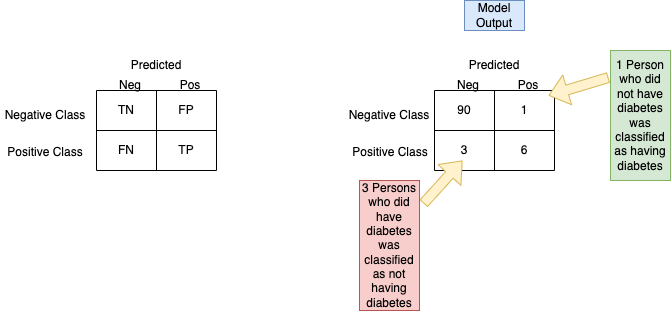

- **Accuracy**: We have over 96% accuracy! This is simply because less than 5% of our data is actually diabetic persons.
- **Precision:** When it predicts yes, how often is it correct? TP/predicted yes = 6/7 = 0.857
- **Recall**: When it's actually yes, how often does it predict yes? TP/actual yes = 6/9 = 0.666
- **F1-Score**: The harmonic mean of precision and recall - 2 * ((precision * recall) / (precision + recall)) = 0.75
- The higher the F1 score the better, with 0 being the worst possible and 1 being the best.
- In this case we might be more concerned with Recall as opposed to Precision.
- We may also want to increase the penalty for FN since they are more detrimental than a FP.
- https://link.springer.com/chapter/10.1007/978-3-030-36178-5_4
- Some material referenced from: https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

### Topic Modelling

Topic modeling is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents.

Non Negative Matrix Factorization (NMF), Latent Dirichlet Allocation (LDA) and Single Value Decomposition (SVD) algorithms will be used to find topics in a document collection. The output of the derived topics involved assigning a numeric label to the topic and printing out the top words in a topic.

The algorithms are not able to automatically determine the number of topics and this value must be set when running the algorithm. Comprehensive documentation on available parameters is available for both [NMF](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html), [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation) and [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

- https://medium.com/analytics-vidhya/topic-modeling-with-non-negative-matrix-factorization-nmf-3caf3a6bb6da
- https://www.analyticsvidhya.com/blog/2021/06/part-18-step-by-step-guide-to-master-nlp-topic-modelling-using-lda-probabilistic-approach/
- https://towardsdatascience.com/latent-semantic-analysis-distributional-semantics-in-nlp-ea84bf686b50

In [58]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\n")
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(documents[doc_index])
            print("\n")

In [59]:
documents = list(X)[0:10000]
print(len(documents))

10000


In [60]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [61]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names_out()

In [62]:
no_topics = 5

In [63]:
# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

In [64]:
no_top_words = 10
no_top_documents = 4
print("NMF Topics \n\n")
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)

NMF Topics 


Topic 0:
like taste good product great just flavor love really chocolate


These chips are the BEST out there. Period. Love, love, love them. I haven't tried a flavor I don't like. Excellent with salsa, hummus, taco salads, or just plain. THe multi-grain is great, and I also like the blue corn. This weekend I just tried a couple of new flavors I found in a store, Sweet Potato BBQ and Sweet Potato with salt and pepper. Oh my gosh good. My husband likes the Jalapeno kind. I generally don't care for spicy things and was hesitant to try that flavor, but it wasn't bad spicy, and just had an all around great flavor like all the others. Add in the fact that they are gluten free, all natural, AND non-GMO.....goodness, if they were only organic I think I'd pass out!


After reading all the glowing reviews, I decided to order this for my son's lunch brown bag. I found it taste a little stale, just not the fresh taste like you know when you are eating a good chocolate chip cookie an

In [65]:
# Run LDA
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

In [66]:
print("\n\nLDA Topics \n\n")
display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)



LDA Topics 


Topic 0:
br product organic ingredients natural sugar butter oil fat peanut


Ingredients: organic sprouted whole grain wheat flour, water, organic extra virgin olive oil, salt, yeast and soda.<br /><br />Unique Essential Eating SPROUTED 100% Whole Grain Pretzel PUFFS are made with organic flour that digests as a vegetable. These first-of-a-kind snacks contain 25 grams of whole grains per serving. The proprietary sprouting process adds great flavor and unlocks the nutrients, including antioxidants, that lay dormant in whole grains and allows them to be more easily digested. This is the first pretzel made with organic extra virgin olive oil.


Any product with hydrogenated vegetable oils as the first ingredient isn't worth buying.  This stuff has been banned in NY for a reason - it is poison for the human body. See the Wikipedia article on trans fats for more information.  Here is a clip : "Because of these facts and concerns, the NAS has concluded there is no safe level

In [67]:
#SVD
lsi_model = TruncatedSVD(n_components=no_topics, n_iter=7, random_state=42).fit(tf)
lsi_W = lsi_model.transform(tf)
lsi_H = lsi_model.components_

In [68]:
print("\n\nLSI Topics \n\n")
display_topics(lsi_H, lsi_W, tf_feature_names, documents, no_top_words, no_top_documents)



LSI Topics 


Topic 0:
br like food product just taste good flavor coffee really


.....SUBTITLE:  READ THE E N T I R E....DESCRIPTION CAREFULLY OF ANYTHING<br />  YOU BUY!<br /><br />JUICY JUICE has a reputation for being 100% juice.  Always!  No additives, preservatives....and even no extra sweeteners!  It is<br />also often regarded as a children's beverage -- and to me, that<br />means the manufacturers have taken EXTRA care that the product is<br />as good as can be.  After all, no manufacturer wants to be accused<br />of giving health problems, (now or in the future), or even out-<br />right poisoning, children!  To me, a product specifically made for<br />children, (and/or usually associated with children's eating or<br />drinking it), is often, (but not always), an inexpensive way to get<br />gourmet -- or almost gourmet -- quality food at a good price.<br /><br />I've had Juicey Juice before...and enjoyed it immensely.  But -- the<br />Juicy Juice I have heretofore imbibed w

### WordCloud

In [69]:
# ! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [70]:
def print_cloud(data):
    text = " ".join(review for review in data)
    print ("There are {} words in the combination of all reviews.".format(len(text)))
    stopwords_set = set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=stopwords_set, background_color="white").generate(text)
    return wordcloud

There are 74300872 words in the combination of all reviews.


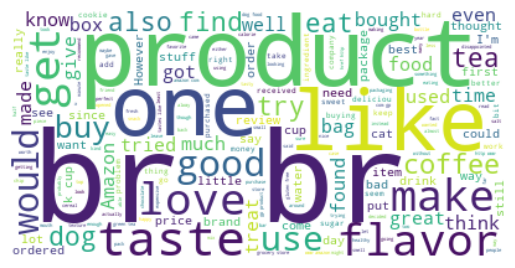

In [71]:
wordcloud = print_cloud(df['Text'])
fig = plt.figure(1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig("word1.png", dpi=300)